In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_boston, load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
plt.style.use('seaborn')
from sklearn.metrics import r2_score# 선형 모델(Linear Models)
from sklearn.linear_model import LinearRegression, SGDRegressor # 공식
from sklearn.neural_network import MLPRegressor # 학습(딥러닝)
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [40]:
tree_df = pd.read_csv('./data/trees.csv')
tree_df

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [41]:
vif =pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(tree_df.values, i )  for i in range( tree_df.shape[1] ) ]
vif['features'] = tree_df.columns
vif

,VIF Factor,features
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


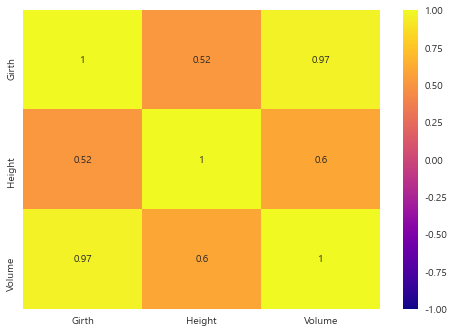

In [42]:
import seaborn as sb
sb.heatmap(tree_df.corr(),annot=True,cmap='plasma' ,vmin =-1,vmax=1)
plt.show()

In [43]:
x_data = tree_df.iloc[:,:-1]
y_data = tree_df.iloc[:,[-1]]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [65]:
model = make_pipeline(StandardScaler(),LinearRegression())
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [66]:
r2scores = cross_val_score( model, x_data, y_data ,cv=5, scoring='r2', verbose=1)
print( r2scores )
print( r2scores.mean() )

[-2.42679092  0.59361755 -0.14097307  0.45908741 -0.6044407 ]
-0.4238999480904351


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [68]:
model.fit(x_train, y_train)
model.predict([[8.8,63],[10.5,72]])

array([[ 5.84983575],
       [16.27579072]])

# 2번 문제

In [48]:
tree_df.loc[tree_df['Volume'] >= 40,'정도'] = '크다'
tree_df.loc[tree_df['Volume'] < 40,'정도'] = '적음'

In [50]:
tree_df

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


# 3번 문제

In [57]:
display(tree_df.loc[tree_df['Height'].idxmax(),'Height'])
display(tree_df.loc[tree_df['Height'].idxmin(),'Height'])

87

63

# 4번 문제

In [60]:
tree_df_top5 = tree_df.sort_values(by="Girth",
                                    ascending=False).head(5)
tree_df_top5

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
29,18.0,80,51.0,크다
28,18.0,80,51.5,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다
